In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [97]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col = 'date',parse_dates = ['date'])
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [98]:
df = df[(df.value >= df.value.quantile(0.025)) & (df.value <= df.value.quantile(0.975))]
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

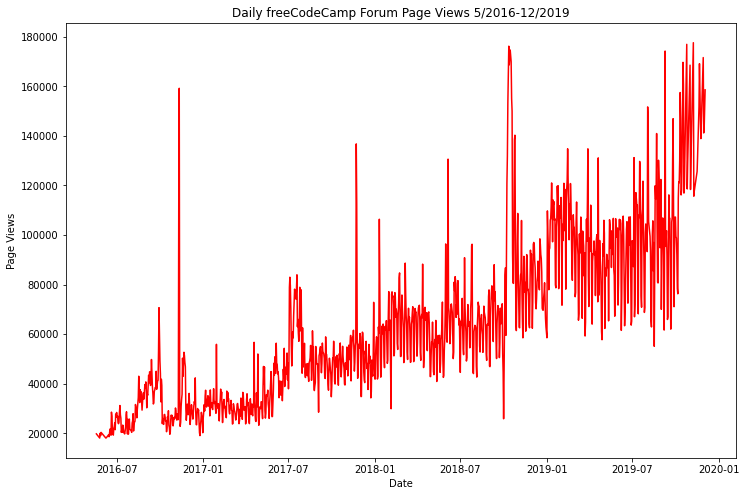

In [99]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(df.index,df.value,'r')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

In [100]:
df['year'] = df.index.year
df['month'] = df.index.month
df.head()


,value,year,month
date,,,
2016-05-19,19736,2016,5
2016-05-26,18060,2016,5
2016-05-27,19997,2016,5
2016-05-28,19044,2016,5
2016-05-29,20325,2016,5


In [101]:
df_bar = df.groupby(by=(['year','month']))['value'].mean()
df_bar.head()

year  month
2016  5        19432.400000
      6        21875.105263
      7        24109.678571
      8        31049.193548
      9        41476.866667
Name: value, dtype: float64

In [102]:
df_bar = df_bar.unstack()

Text(0, 0.5, 'Average Page Views')

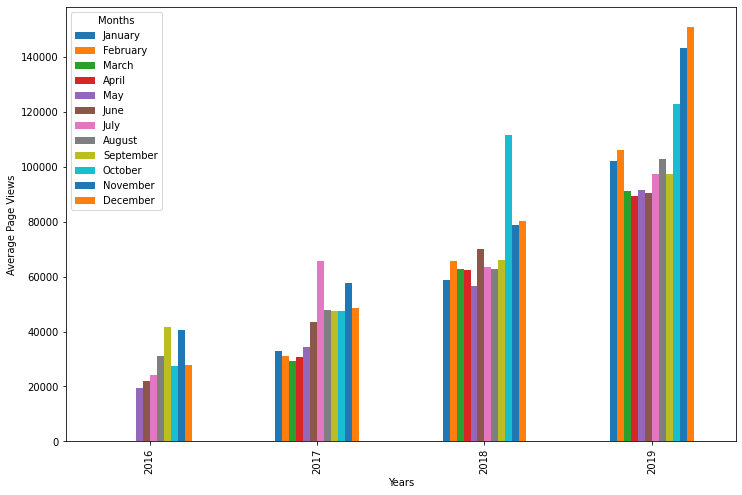

In [103]:
fig = df_bar.plot.bar(figsize=(12,8), legend=True).figure
plt.legend(['January','February','March','April','May','June','July','August','September','October','November','December'], title='Months')
plt.xlabel('Years')
plt.ylabel('Average Page Views')

In [104]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box['num_month'] = df_box.date.dt.month
df_box = df_box.sort_values(by='num_month')
df_box.head()

,date,value,year,month,num_month
210,2017-01-06,37353,2017,Jan,1
937,2019-01-06,94108,2019,Jan,1
936,2019-01-05,77897,2019,Jan,1
935,2019-01-04,94514,2019,Jan,1
934,2019-01-03,100710,2019,Jan,1


Text(0, 0.5, 'Page Views')

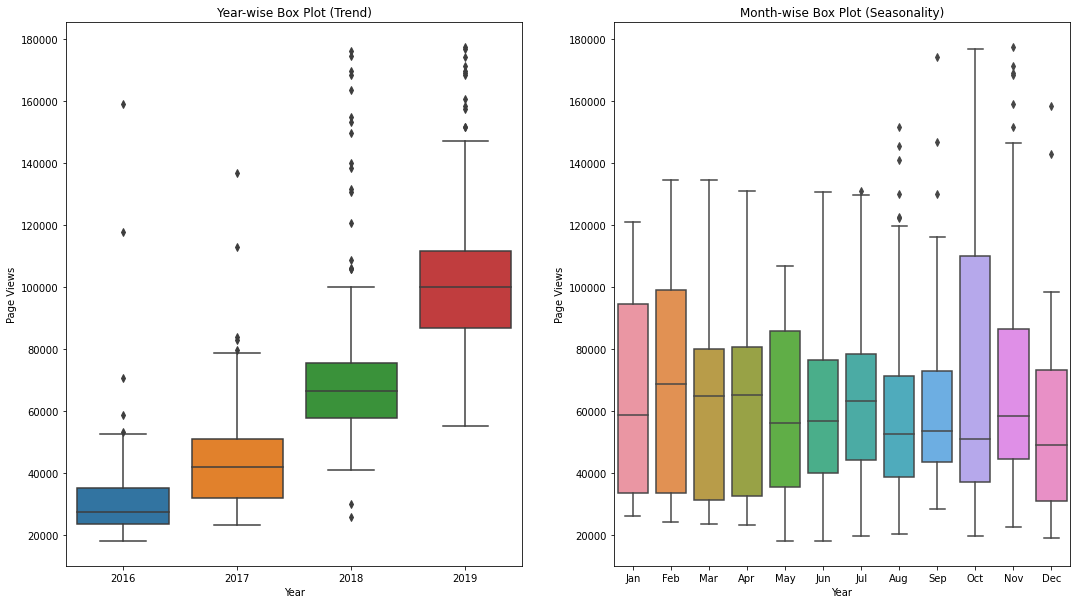

In [105]:
fig, ax = plt.subplots(ncols=2, figsize=(18,10))

ax[0] = sns.boxplot(x=df_box.year, y=df_box.value, ax=ax[0])
ax[0].set_title('Year-wise Box Plot (Trend)')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Page Views')

ax[1] = sns.boxplot(x=df_box.month, y=df_box.value, ax=ax[1])
ax[1].set_title('Month-wise Box Plot (Seasonality)')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Page Views')